In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('2008_election_result.csv')

print(df1.columns, "\n\n")
print("Index:\n", df1.index, "\n\n")
print("Shape:", df1.shape, "\n\n")

print(df1.head(12))


Index(['state', 'county', 'total_votes', 'dem_votes', 'rep_votes',
       'other_votes', 'dem_share', 'east_west'],
      dtype='object') 


Index:
 RangeIndex(start=0, stop=3153, step=1) 


Shape: (3153, 8) 


   state                                       county  total_votes  dem_votes  \
0     AK    State House District 8, Denali-University        10320       4995   
1     AK  State House District 37, Bristol Bay-Aleuti         4665       1868   
2     AK  State House District 12, Richardson-Glenn H         7589       1914   
3     AK      State House District 13, Greater Palmer        11526       2800   
4     AK     State House District 14, Greater Wasilla        10456       2132   
5     AK  State House District 16, Chugiak-South Mat-        10697       2636   
6     AK        State House District 15, Rural Mat-Su        11086       2510   
7     AK      State House District 39, Bering Straits         5184       2695   
8     AK              State House District 40, Arctic       

In [3]:
# What is the goal of statistical inference?
# Statistical inference involves taking your data to probabilistic conclusions about what you would expect if you took even 
# more data, and you can make decisions based on these conclusions.
# We use probabilistic language in statistical inference
# Probabilistic language is in fact very precise. It precisely describes uncertainty.
# Data are almost never exactly the same when acquired again, and probability allows us to say how much we expect them to vary

"""
Generating random numbers using the np.random module
We will be hammering the np.random module for the rest of this course and its sequel. 
Actually, you will probably call functions from this module more than any other while wearing your hacker statistician hat. 
Let's start by taking its simplest function, np.random.random() for a test spin. 
The function returns a random number between zero and one.
"""

print(np.random.random())

for _ in range(5):
    print(np.random.random())

print("\nCon size:\n", np.random.random(size=10))        # Con size anzichè usare il for loop

# Setta il seed se hai bisogno di riprodurre i risultati

0.6332995213031704
0.15814134218364373
0.008504045541874006
0.4305997479172027
0.5182804567579662
0.08673942472642482

Con size:
 [0.77296678 0.42095883 0.03155956 0.34558589 0.5022594  0.10731902
 0.40134794 0.54605189 0.65493759 0.38197897]


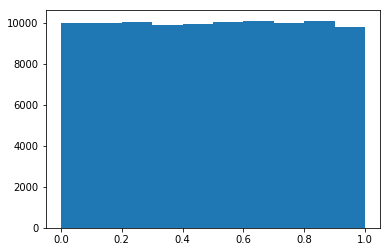

In [5]:
# Seed the random number generator, so tou can reproduce the result
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
plt.hist(random_numbers)

# Show the plot
plt.show()

# The histogram is almost exactly flat across the top, 
# indicating that there is equal chance that a randomly-generated number is in any of the bins of the histogram.

# The np.random module and Bernoulli trials

You can think of a Bernoulli trial as a flip of a possibly biased coin. Specifically, each coin flip has a probability p of landing heads (success) and probability 1−p of landing tails (failure). In this exercise, you will write a function to perform n Bernoulli trials, perform_bernoulli_trials(n, p), which returns the number of successes out of n Bernoulli trials, each of which has probability p of success. To perform each Bernoulli trial, use the np.random.random() function, which returns a random number between zero and one.

In [6]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if (random_number < p):
            n_success += 1

    return n_success

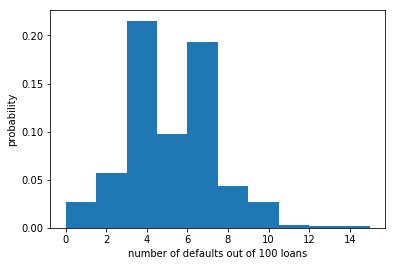


Defaults per 100 prestiti concessi(con p=5%):
[ 6.  5.  7.  8.  5.  5.  3.  2.  7.  6.  7.  3.  8.  3.  8.  5.  2.  6.
  4.  5.  3.  2.  9.  5.  5.  3.  8.  7.  7.  5.  4.  3.  4.  5.  6.  1.
  8.  4.  2.  9.  6.  5.  2.  6.  3.  6.  2.  6.  4.  4.  6.  4.  5.  4.
  3.  4.  6.  3.  4.  8.  2.  4.  1.  6.  6.  6.  2.  2.  3.  8.  7.  2.
  6.  6.  3.  6.  3. 10.  7.  6.  4.  5.  8.  4.  6.  4.  6.  1. 10.  4.
  4.  4.  5.  4.  5.  2.  8.  7.  3.  7.  9.  6.  8.  2.  5.  4.  3.  6.
  2.  6.  9.  5.  6.  6.  4.  4.  7.  6.  6.  7.  1.  5.  4.  1.  4.  6.
  3.  2.  3.  8.  8.  6.  7.  6.  4.  4.  7.  2.  4.  7.  5.  4.  6.  6.
  8.  4.  2.  5.  6.  3.  7.  6.  5. 10.  4.  4.  5.  7.  7.  6.  6.  4.
  6.  9.  4.  4.  7.  4.  8.  5.  4.  3.  3.  6.  6.  1.  5.  7.  3.  7.
  3.  4.  4.  3.  2.  2.  0.  7.  3.  7.  7.  3.  8.  6.  4.  3.  4.  4.
  5.  2.  4.  4.  3.  7.  3.  6.  4.  2.  6.  6.  6.  7.  6.  4.  6.  6.
  7.  8.  7.  3.  3.  3.  4.  7.  6.  5.  3.  6.  4.  2.  3.  2.  4.  6.
  3.

In [15]:
"""
How many defaults might we expect?
Let's say a bank made 100 mortgage loans. 
It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. 
You would like to know the probability of getting a given number of defaults, 
given that the probability of a default is p = 0.05. To investigate this, you will do a simulation. 
You will perform 100 Bernoulli trials using the perform_bernoulli_trials() function 
you wrote in the previous exercise and record how many defaults we get. Here, a success is a default. 
(Remember that the word "success" just means that the Bernoulli trial evaluates to True, 
i.e., did the loan recipient default?) You will do this for another 100 Bernoulli trials. 
And again and again until we have tried it 1000 times. 
Then, you will plot a histogram describing the probability of the number of defaults.
"""

# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
# Initialize n_defaults, an empty array, using np.empty(). 
# It should contain 1000 entries, since we are doing 1000 simulations.
n_defaults = np.empty(1000)

# Write a for loop with 1000 iterations to compute the number of defaults per 100 loans using the perform_bernoulli_trials() 
# function. It accepts two arguments: the number of trials n - in this case 100 - and the probability of success p - 
# in this case the probability of a default, which is 0.05. 
# On each iteration of the loop store the result in an entry of n_defaults.
# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)


# Plot a histogram of n_defaults. 
# Include the normed=True keyword argument so that the height of the bars of the histogram indicate the probability.
# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, density=True)
# WARNING: The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

# This is actually not an optimal way to plot a histogram when the results are known to be integers.

print("\nDefaults per 100 prestiti concessi(con p=5%):")
print(n_defaults)
print("\nlength/esperimenti:", len(n_defaults))


In [17]:
# ECDF- Empirical cumulative distributed function

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y


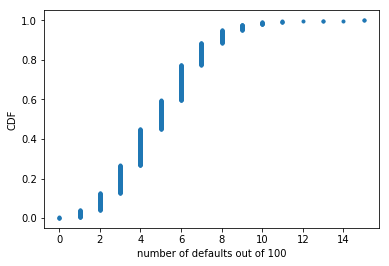

Probability of losing money = 0.022


In [18]:
"""
Will the bank fail?
Plot the number of defaults you got from the previous exercise, in your namespace as n_defaults, as a CDF. 
The ecdf() function you wrote 
"""

# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with labeled axes
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('number of defaults out of 100')
_ = plt.ylabel('CDF')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, 
# what is the probability that the bank will lose money?
# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

# As we might expect, we most likely get 5/100 defaults. 
# But we still have about a 2% chance of getting 10 or more defaults out of 100 loans.


# Sampling out of the Binomial distribution

Compute the probability mass function for the number of defaults we would expect for 100 loans as in the last section, but instead of simulating all of the Bernoulli trials, perform the sampling using np.random.binomial(). This is identical to the calculation you did in the last set of exercises using your custom-written perform_bernoulli_trials() function, but far more computationally efficient. Given this extra efficiency, we will take 10,000 samples instead of 1000. After taking the samples, plot the CDF as last time. This CDF that you are plotting is that of the Binomial distribution.

In teoria della probabilità la distribuzione binomiale è una distribuzione di probabilità discreta che descrive il numero di successi in un processo di Bernoulli, ovvero la variabile aleatoria {\displaystyle S_{n}=X_{1}+X_{2}+\dotsb +X_{n}}S_n=X_1+X_2+\dotsb+X_n che somma {\displaystyle n}n variabili aleatorie indipendenti di uguale distribuzione di Bernoulli {\displaystyle {\mathcal {B}}(p)}{\mathcal  {B}}(p).

Esempi di casi di distribuzione binomiale sono i risultati di una serie di lanci di una stessa moneta o di una serie di estrazioni da un'urna (con reintroduzione), ognuna delle quali può fornire due soli risultati: il successo con probabilità {\displaystyle p}p e il fallimento con probabilità {\displaystyle q=1-p}q=1-p.

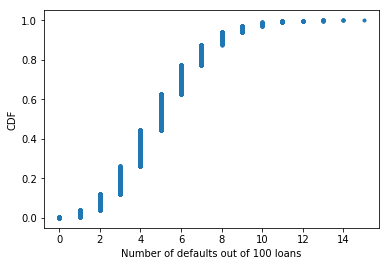

In [21]:
# Draw samples out of the Binomial distribution using np.random.binomial(). 
# You should use parameters n = 100 and p = 0.05, and set the size keyword argument to 10000.
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(100, 0.05, size=10000)

# Compute CDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with axis labels
plt.plot(x, y, marker=".", linestyle='none')
plt.xlabel('Number of defaults out of 100 loans')
plt.ylabel('CDF')

# Show the plot
plt.show()


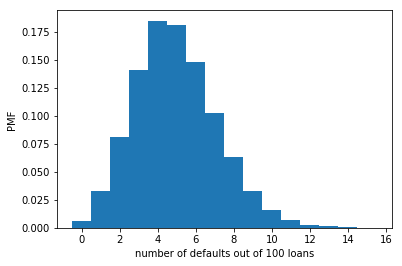

In [24]:
# PMF - Probability Mass Function

"""
Plotting the Binomial PMF
As mentioned in the video, plotting a nice looking PMF requires a bit of matplotlib trickery that we will not go into here. 
Instead, we will plot the PMF of the Binomial distribution as a histogram with skills you have already learned. 
The trick is setting up the edges of the bins to pass to plt.hist() via the bins keyword argument. 
We want the bins centered on the integers. 
So, the edges of the bins should be -0.5, 0.5, 1.5, 2.5, ... up to max(n_defaults) + 1.5. 
You can generate an array like this using np.arange() and then subtracting 0.5 from the array.
"""

# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
_ = plt.hist(n_defaults, density=True, bins=bins)

# Label axes
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('PMF')

# Show the plot
plt.show()

# Distribuzione di Poisson

In teoria delle probabilità la distribuzione di Poisson (o poissoniana) è una distribuzione di probabilità discreta che esprime le probabilità per il numero di eventi che si verificano successivamente ed indipendentemente in un dato intervallo di tempo, sapendo che mediamente se ne verifica un numero {\displaystyle \lambda }\lambda . Ad esempio, si utilizza una distribuzione di Poisson per misurare il numero di chiamate ricevute in un call-center in un determinato arco temporale, come una mattinata lavorativa. Questa distribuzione è anche nota come legge degli eventi rari.

Prende il nome dal matematico francese Siméon-Denis Poisson.

## Relationship between Binomial and Poisson distributions

You just heard that the Poisson distribution is a limit of the Binomial distribution for rare events. This makes sense if you think about the stories. Say we do a Bernoulli trial every minute for an hour, each with a success probability of 0.1. We would do 60 trials, and the number of successes is Binomially distributed, and we would expect to get about 6 successes. This is just like the Poisson story we discussed in the video, where we get on average 6 hits on a website per hour. So, the Poisson distribution with arrival rate equal to np approximates a Binomial distribution for n Bernoulli trials with probability p of success (with n large and p small). Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

In [27]:
# Using the np.random.poisson() function, draw 10000 samples from a Poisson distribution with a mean of 10
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, size=10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Make a list of the n and p values to consider for the Binomial distribution. Choose n = [20, 100, 1000] and 
# p = [0.5, 0.1, 0.01] so that np is always 10.
# np è la media(pensaci)
# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

# The means are all about the same, which can be shown to be true by doing some pen-and-paper work. 
# The standard deviation of the Binomial distribution gets closer and closer to that of the Poisson distribution 
# as the probability p gets lower and lower.

# When we have rare events (low p, high n), the Binomial distribution is Poisson. 
# This has a single parameter, the mean number of successes per time interval, 
# in our case the mean number of no-hitters per season.


Poisson:      10.0243 3.168202883339386
n = 20 Binom: 10.0381 2.224825474054089
n = 100 Binom: 9.996 3.004294259888668
n = 1000 Binom: 9.9609 3.1248953886490347


In [36]:
"""
Was 2015 anomalous?
1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). 
Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?
"""

# Draw 10000 samples from a Poisson distribution with a mean of 251/115 and assign to n_nohitters.
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, size=10000)

# Determine how many of your samples had a result greater than or equal to 7 and assign to n_large.
# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute the probability, p_large, of having 7 or more no-hitters by dividing n_large by the total number of samples (10000)
# Compute probability of getting seven or more: p_large
p_large = n_large / 10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)

print(f"\nDistribuzione di probabilità di Poisson(con media uguale a { round(251/115, 4) }):")
print(n_nohitters)


Probability of seven or more no-hitters: 0.0069

Distribuzione di probabilità di Poisson(con media uguale a 2.1826):
[4 1 1 ... 2 3 1]
